In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('Students _Performance _Prediction.csv') 

In [37]:
df = df.dropna()

In [39]:
label_encoders = {}
categorical_cols = ['Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 
                    'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                    'Notes', 'Listening_in_Class', 'Project_work']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [41]:
X = df.drop(['Student_ID', 'Grade'], axis=1)
y = df['Grade']

In [43]:
le_grade = LabelEncoder()
y = le_grade.fit_transform(y)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', random_state=42)

In [51]:
dt.fit(X_train, y_train)
knn.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [53]:
y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)

In [69]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=le_grade.classes_, zero_division=0))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_grade.classes_, yticklabels=le_grade.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Evaluation for Decision Tree:
Accuracy: 0.22727272727272727

Classification Report:
              precision    recall  f1-score   support

          AA       0.25      0.33      0.29         9
          BA       0.25      0.10      0.14        10
          BB       0.29      0.29      0.29         7
          CB       0.25      0.50      0.33         2
          CC       0.12      0.25      0.17         4
          DC       0.25      0.33      0.29         3
          DD       0.20      0.20      0.20         5
        Fail       0.00      0.00      0.00         4

    accuracy                           0.23        44
   macro avg       0.20      0.25      0.21        44
weighted avg       0.22      0.23      0.21        44


Confusion Matrix:


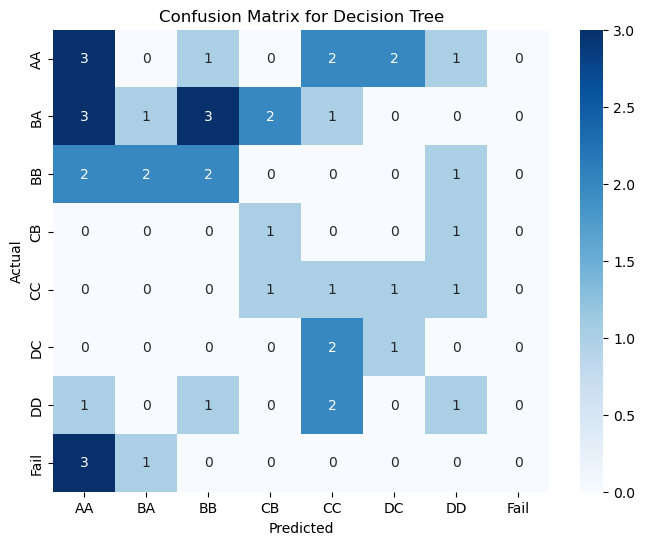

Evaluation for KNN:
Accuracy: 0.1590909090909091

Classification Report:
              precision    recall  f1-score   support

          AA       0.13      0.22      0.17         9
          BA       0.12      0.10      0.11        10
          BB       0.22      0.29      0.25         7
          CB       1.00      0.50      0.67         2
          CC       0.17      0.25      0.20         4
          DC       0.00      0.00      0.00         3
          DD       0.00      0.00      0.00         5
        Fail       0.00      0.00      0.00         4

    accuracy                           0.16        44
   macro avg       0.21      0.17      0.17        44
weighted avg       0.15      0.16      0.15        44


Confusion Matrix:


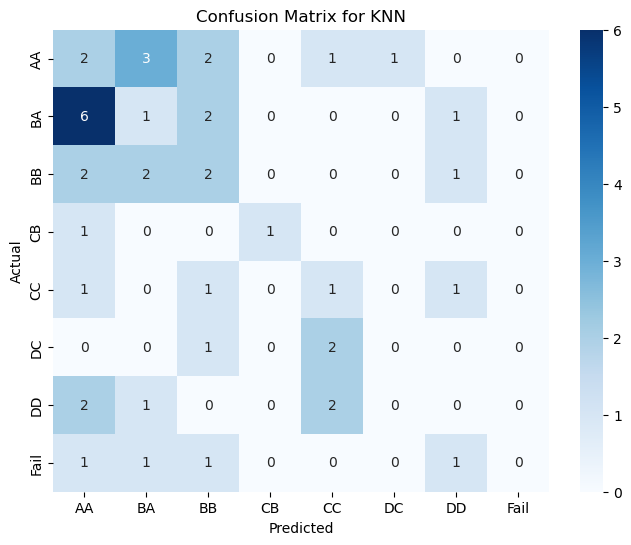

Evaluation for SVM:
Accuracy: 0.29545454545454547

Classification Report:
              precision    recall  f1-score   support

          AA       0.23      0.89      0.36         9
          BA       0.00      0.00      0.00        10
          BB       0.67      0.29      0.40         7
          CB       0.00      0.00      0.00         2
          CC       0.33      0.25      0.29         4
          DC       0.00      0.00      0.00         3
          DD       0.67      0.40      0.50         5
        Fail       0.00      0.00      0.00         4

    accuracy                           0.30        44
   macro avg       0.24      0.23      0.19        44
weighted avg       0.26      0.30      0.22        44


Confusion Matrix:


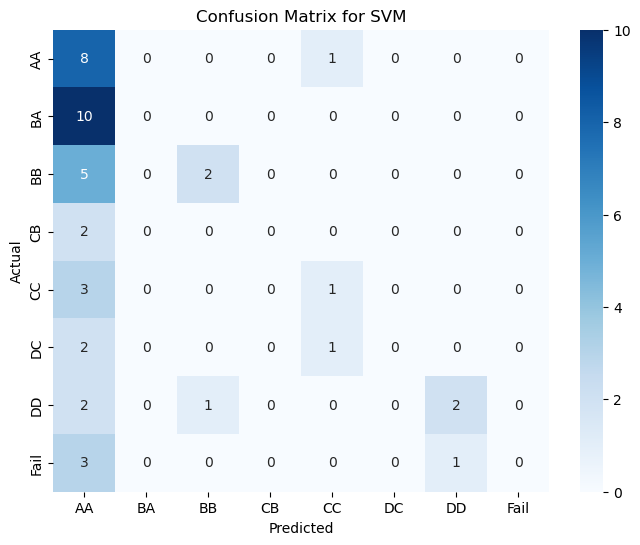

In [71]:
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_knn, "KNN")
evaluate_model(y_test, y_pred_svm, "SVM")

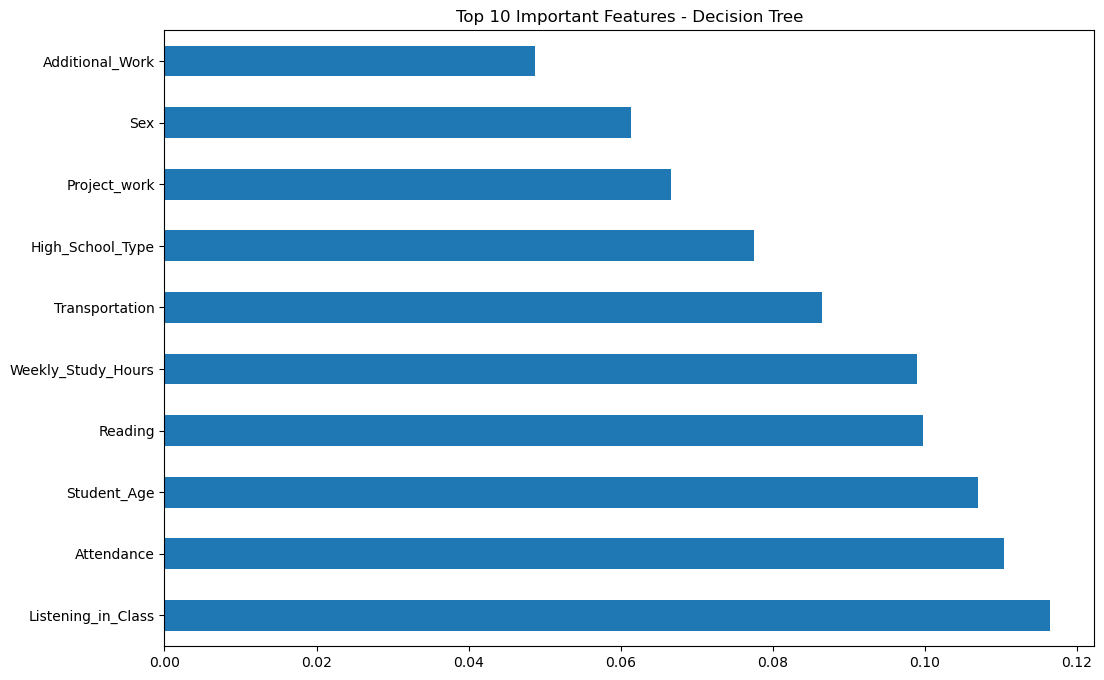

In [73]:
plt.figure(figsize=(12,8))
feature_importances = pd.Series(dt.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - Decision Tree')
plt.show()

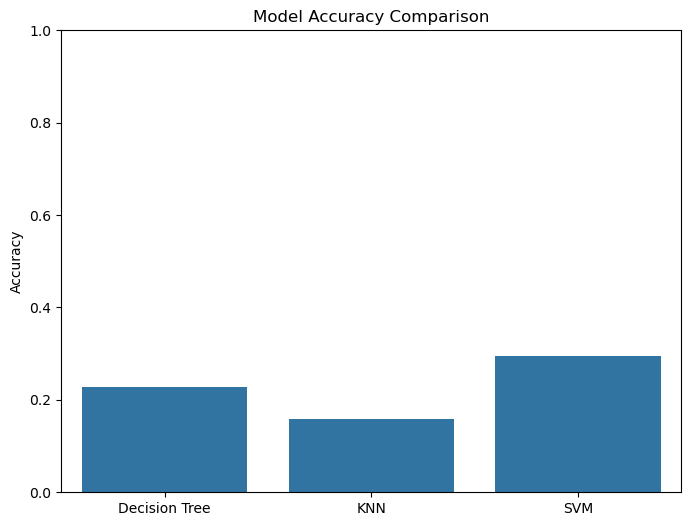

In [75]:
models = ['Decision Tree', 'KNN', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_dt), 
              accuracy_score(y_test, y_pred_knn), 
              accuracy_score(y_test, y_pred_svm)]

plt.figure(figsize=(8,6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()